# ============================================================
# 1) Import Libraries

In [1]:
# pip install --upgrade --user scikit-learn numpy scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================
# 2) Import Dataset

In [3]:
diabetic_data = pd.read_csv("../data/diabetic_data.csv")

In [4]:
ids_mapping = pd.read_csv("../data/IDs_mapping.csv")

# =============================================================
# 3) Explore Data

- Data Overview

In [5]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
ids_mapping.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [7]:
diabetic_data.shape

(101766, 50)

In [8]:
ids_mapping.shape

(67, 2)

- Lists of Columns

In [9]:
diabetic_cols = diabetic_data.columns.to_list()
diabetic_cols

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [10]:
ids_mapping_cols = ids_mapping.columns.to_list()
ids_mapping_cols

['admission_type_id', 'description']

- Data Inspection

In [11]:
for col in diabetic_cols:
    print(f"COLUMN) {col}: Dtype={diabetic_data[col].dtype}, Type={type(diabetic_data[col])}, Values={diabetic_data[col].unique()}")
    print("-------------------------------------")

COLUMN) encounter_id: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  2278392    149190     64410 ... 443854148 443857166 443867222]
-------------------------------------
COLUMN) patient_nbr: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
-------------------------------------
COLUMN) race: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
-------------------------------------
COLUMN) gender: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Female' 'Male' 'Unknown/Invalid']
-------------------------------------
COLUMN) age: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
-------------------------------------
COLUMN) weight: Dtype=object, Type=<class 'pandas.core.series.Series'>, Value

In [12]:
for col in ids_mapping_cols:
    print(f"COLUMN) {col}: Dtype={ids_mapping[col].dtype}, Type={type(ids_mapping[col])}, Values={ids_mapping[col].unique()}")
    print("-------------------------------------")

COLUMN) admission_type_id: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['1' '2' '3' '4' '5' '6' '7' '8' nan 'discharge_disposition_id' '9' '10'
 '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24'
 '25' '26' '30' '27' '28' '29' 'admission_source_id']
-------------------------------------
COLUMN) description: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Available' nan
 'Trauma Center' 'Not Mapped' 'description' 'Discharged to home'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to SNF' 'Discharged/transferred to ICF'
 'Discharged/transferred to another type of inpatient care institution'
 'Discharged/transferred to home with home health service' 'Left AMA'
 'Discharged/transferred to home under care of Home IV provider'
 'Admitted as an inpatient to this hospital'
 'Neonate discharged to another hospital for neonatal aftercare' 'Expired'
 'Still patie

In [13]:
print(ids_mapping.to_string())

           admission_type_id                                                                                                description
0                          1                                                                                                  Emergency
1                          2                                                                                                     Urgent
2                          3                                                                                                   Elective
3                          4                                                                                                    Newborn
4                          5                                                                                              Not Available
5                          6                                                                                                        NaN
6                          7                    

# =============================================================
# 4) Data Wrangling

## 4-1) Data Cleaning & Manipulation - Dataframe: ids_mapping

### Split 1 - admission_type_id

- Slice

In [14]:
admission_type_id = ids_mapping.iloc[0:9]
admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN


- Null checkup

In [15]:
admission_type_id.isnull().sum()

admission_type_id    1
description          2
dtype: int64

- Clean a row of null

In [16]:
admission_type_id = admission_type_id.drop(index=admission_type_id.index[8])
admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


- Change null-like values to 'Unknown' string value

In [17]:
admission_type_id['admission_type_id_desc'] = admission_type_id['description'].replace({np.nan: 'Unknown', 'Not Mapped': 'Unknown', 'Not Available': 'Unknown'})
admission_type_id = admission_type_id.drop('description', axis=1)
admission_type_id

,admission_type_id,admission_type_id_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Unknown
5,6,Unknown
6,7,Trauma Center
7,8,Unknown


### Split 2 - discharge_disposition_id

- Slice

In [18]:
discharge_disposition_id = ids_mapping.iloc[9:41]
discharge_disposition_id

,admission_type_id,description
9,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital


- Reset index

In [19]:
discharge_disposition_id_reset = discharge_disposition_id.reset_index(drop=True)
discharge_disposition_id_reset

,admission_type_id,description
0,discharge_disposition_id,description
1,1,Discharged to home
2,2,Discharged/transferred to another short term h...
3,3,Discharged/transferred to SNF
4,4,Discharged/transferred to ICF
5,5,Discharged/transferred to another type of inpa...
6,6,Discharged/transferred to home with home healt...
7,7,Left AMA
8,8,Discharged/transferred to home under care of H...
9,9,Admitted as an inpatient to this hospital


- Set the first row to header

In [20]:
discharge_disposition_id_reset.columns = discharge_disposition_id_reset.iloc[0]
discharge_disposition_id_reset

,discharge_disposition_id,description
0,discharge_disposition_id,description
1,1,Discharged to home
2,2,Discharged/transferred to another short term h...
3,3,Discharged/transferred to SNF
4,4,Discharged/transferred to ICF
5,5,Discharged/transferred to another type of inpa...
6,6,Discharged/transferred to home with home healt...
7,7,Left AMA
8,8,Discharged/transferred to home under care of H...
9,9,Admitted as an inpatient to this hospital


- Drop the first row

In [21]:
discharge_disposition_id_new = discharge_disposition_id_reset.drop(index=discharge_disposition_id_reset.index[0]) 
discharge_disposition_id_new

,discharge_disposition_id,description
1,1,Discharged to home
2,2,Discharged/transferred to another short term h...
3,3,Discharged/transferred to SNF
4,4,Discharged/transferred to ICF
5,5,Discharged/transferred to another type of inpa...
6,6,Discharged/transferred to home with home healt...
7,7,Left AMA
8,8,Discharged/transferred to home under care of H...
9,9,Admitted as an inpatient to this hospital
10,10,Neonate discharged to another hospital for neo...


- Reset index

In [22]:
discharge_disposition_id = discharge_disposition_id_new.reset_index(drop=True)
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


- Clean a row of null

In [23]:
discharge_disposition_id = discharge_disposition_id.drop(index=discharge_disposition_id.index[-1])
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


- Change null-like values to 'Unknown' string value

In [24]:
discharge_disposition_id['discharge_disposition_id_desc'] = discharge_disposition_id['description'].replace({np.nan: 'Unknown', 
                                                                                           'Not Mapped': 'Unknown', 
                                                                                           'Unknown/Invalid': 'Unknown'})
discharge_disposition_id = discharge_disposition_id.drop('description', axis=1)
discharge_disposition_id

,discharge_disposition_id,discharge_disposition_id_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


### Split 3 - admission_source_id

- Slice

In [25]:
admission_source_id = ids_mapping.iloc[41:]
admission_source_id

,admission_type_id,description
41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available


- Reset index

In [26]:
admission_source_id_reset = admission_source_id.reset_index(drop=True)
admission_source_id_reset

,admission_type_id,description
0,admission_source_id,description
1,1,Physician Referral
2,2,Clinic Referral
3,3,HMO Referral
4,4,Transfer from a hospital
5,5,Transfer from a Skilled Nursing Facility (SNF)
6,6,Transfer from another health care facility
7,7,Emergency Room
8,8,Court/Law Enforcement
9,9,Not Available


- Set the first row to header

In [27]:
admission_source_id_reset.columns = admission_source_id_reset.iloc[0]
admission_source_id_reset

,admission_source_id,description
0,admission_source_id,description
1,1,Physician Referral
2,2,Clinic Referral
3,3,HMO Referral
4,4,Transfer from a hospital
5,5,Transfer from a Skilled Nursing Facility (SNF)
6,6,Transfer from another health care facility
7,7,Emergency Room
8,8,Court/Law Enforcement
9,9,Not Available


- Drop the first row

In [28]:
admission_source_id_reset_new = admission_source_id_reset.drop(index=admission_source_id_reset.index[0]) 
admission_source_id_reset_new

,admission_source_id,description
1,1,Physician Referral
2,2,Clinic Referral
3,3,HMO Referral
4,4,Transfer from a hospital
5,5,Transfer from a Skilled Nursing Facility (SNF)
6,6,Transfer from another health care facility
7,7,Emergency Room
8,8,Court/Law Enforcement
9,9,Not Available
10,10,Transfer from critial access hospital


- Reset index

In [29]:
admission_source_id = admission_source_id_reset_new.reset_index(drop=True)
admission_source_id

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


- Change null-like values to 'Unknown' string value

In [30]:
admission_source_id['admission_source_id_desc'] = admission_source_id['description'].str.strip().replace({np.nan: 'Unknown', 
                                                                                 "Not Available":'Unknown', 
                                                                                 "Not Mapped":'Unknown', 
                                                                                 'Unknown/Invalid':'Unknown'})
admission_source_id = admission_source_id.drop('description', axis=1)
admission_source_id

,admission_source_id,admission_source_id_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Unknown
9,10,Transfer from critial access hospital


- Null checkup

In [31]:
admission_source_id.isnull().sum()

0
admission_source_id         0
admission_source_id_desc    0
dtype: int64

## 4-2) Data Cleaning & Manipulation - Dataframe: diabetic_data

- Inspect common columns of diabetic_data and ids_mapping

In [32]:
diabetic_data['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [33]:
diabetic_data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [34]:
diabetic_data['admission_source_id'].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [35]:
for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
    print(col, ": \n")
    print(diabetic_data[col].value_counts())
    print('---------------------\n')

admission_type_id : 

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64
---------------------

discharge_disposition_id : 

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64
---------------------

admission_source_id : 

admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64
---------------------



- Inspect 'diabetic_data' dataframe

In [36]:
for col in diabetic_cols:
    print(f"COLUMN) {col}: Dtype={diabetic_data[col].dtype}, Type={type(diabetic_data[col])}, Values={diabetic_data[col].unique()}")
    print("-------------------------------------")

COLUMN) encounter_id: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  2278392    149190     64410 ... 443854148 443857166 443867222]
-------------------------------------
COLUMN) patient_nbr: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
-------------------------------------
COLUMN) race: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
-------------------------------------
COLUMN) gender: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Female' 'Male' 'Unknown/Invalid']
-------------------------------------
COLUMN) age: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
-------------------------------------
COLUMN) weight: Dtype=object, Type=<class 'pandas.core.series.Series'>, Value

- Null checkup in each column

In [37]:
diabetic_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

- Check rows that contain null

In [38]:
diabetic_data[diabetic_data.isnull().any(axis=1)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


- Check columns that contain null-like value ('?')

In [39]:
specific_value = '?'
columns_with_value = diabetic_data.columns[diabetic_data.eq(specific_value).any()]
print(columns_with_value)

Index(['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3'],
      dtype='object')


- Number of rows with '?' value in each column

In [40]:
for col in columns_with_value:
    print(f"{col}: number_of_rows = {len(diabetic_data[diabetic_data[col] == '?'])}")

race: number_of_rows = 2273
weight: number_of_rows = 98569
payer_code: number_of_rows = 40256
medical_specialty: number_of_rows = 49949
diag_1: number_of_rows = 21
diag_2: number_of_rows = 358
diag_3: number_of_rows = 1423


- Copy of diabetic_data to manipulate

In [41]:
df = diabetic_data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Replace '?' with NaN first

In [42]:
df = df.replace('?', np.nan)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Top 12 columns with the most null values
- Columns with 50+% null values should be removed

In [43]:
df.isnull().sum().sort_values(ascending=False).head(12)

weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
troglitazone             0
tolbutamide              0
dtype: int64

- Add a more readable column for re-admitted status

In [44]:
df[['readmitted']].head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [45]:
df['readmission_status'] = df['readmitted'].replace({
    '<30': 'Readmitted within 30 Days',
    '>30': 'Readmitted after 30 Days',
    'NO': 'Not Readmitted'
})

In [46]:
df[['readmitted', 'readmission_status']].head()

,readmitted,readmission_status
0,NO,Not Readmitted
1,>30,Readmitted after 30 Days
2,NO,Not Readmitted
3,NO,Not Readmitted
4,NO,Not Readmitted


- Add a column of median age

COLUMN) age: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)']

In [47]:
df[['age']]

,age
0,[0-10)
1,[10-20)
2,[20-30)
3,[30-40)
4,[40-50)
...,...
101761,[70-80)
101762,[80-90)
101763,[70-80)
101764,[80-90)


In [48]:
df['age_median'] = df['age'].replace({'[0-10)': '5', 
                                      '[10-20)': '15', 
                                      '[20-30)': '25', 
                                      '[30-40)': '35', 
                                      '[40-50)': '45', 
                                      '[50-60)': '55', 
                                      '[60-70)': '65', 
                                      '[70-80)': '75', 
                                      '[80-90)': '85', 
                                      '[90-100)': '95'}).astype(int)

In [49]:
df[['age', 'age_median']]

,age,age_median
0,[0-10),5
1,[10-20),15
2,[20-30),25
3,[30-40),35
4,[40-50),45
...,...,...
101761,[70-80),75
101762,[80-90),85
101763,[70-80),75
101764,[80-90),85


In [50]:
df.shape

(101766, 52)

- Remove unnecessary columns

In [51]:
df_new = df.drop(['weight', 'max_glu_serum', 'A1Cresult', 'readmitted', 'age'], axis=1)
df_new.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_status,age_median
0,2278392,8222157,Caucasian,Female,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,Not Readmitted,5
1,149190,55629189,Caucasian,Female,1,1,7,3,NaN,NaN,...,Up,No,No,No,No,No,Ch,Yes,Readmitted after 30 Days,15
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,Yes,Not Readmitted,25
3,500364,82442376,Caucasian,Male,1,1,7,2,NaN,NaN,...,Up,No,No,No,No,No,Ch,Yes,Not Readmitted,35
4,16680,42519267,Caucasian,Male,1,1,7,1,NaN,NaN,...,Steady,No,No,No,No,No,Ch,Yes,Not Readmitted,45


- Check mode in each column

In [52]:
cols = ['medical_specialty', 'payer_code', 'race', 'diag_3', 'diag_2', 'diag_1']

In [53]:
for col in cols:
    print(col, ": \n")
    print(df_new[col].value_counts())
    print('---------------------\n')

medical_specialty : 

medical_specialty
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 72, dtype: int64
---------------------

payer_code : 

payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
---------------------

race : 

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype:

- Replace null values with mode in each column

In [54]:
for col in cols:
    mode_value = df_new[col].mode()[0]
    df_new[col] = df_new[col].fillna(mode_value)

- Null checkup

In [55]:
df_new.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

- Duplicates checkup

In [56]:
df_new.duplicated().sum()

0

- Inspect the cleaned dataframe

In [57]:
df_new_cols = df_new.columns.to_list()
df_new_cols

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmission_status',
 'age_median']

In [58]:
for col in df_new_cols:
    print(f"COLUMN) {col}: Dtype={df_new[col].dtype}, Type={type(df_new[col])}, Values={df_new[col].unique()}")
    print("-------------------------------------")

COLUMN) encounter_id: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  2278392    149190     64410 ... 443854148 443857166 443867222]
-------------------------------------
COLUMN) patient_nbr: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
-------------------------------------
COLUMN) race: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
-------------------------------------
COLUMN) gender: Dtype=object, Type=<class 'pandas.core.series.Series'>, Values=['Female' 'Male' 'Unknown/Invalid']
-------------------------------------
COLUMN) admission_type_id: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[6 1 2 3 4 5 8 7]
-------------------------------------
COLUMN) discharge_disposition_id: Dtype=int64, Type=<class 'pandas.core.series.Series'>, Values=[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23

In [59]:
df_new_cols = df_new.columns.to_list()
df_new_cols

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmission_status',
 'age_median']

In [60]:
# Rename specific columns using a dictionary
df_renamed = df_new.rename(columns={
    'glyburide-metformin': 'glyburide_metformin',
    'glipizide-metformin': 'glipizide_metformin',
    'glimepiride-pioglitazone': 'glimepiride_pioglitazone',
    'metformin-rosiglitazone': 'metformin_rosiglitazone',
    'metformin-pioglitazone': 'metformin_pioglitazone',
    'change': 'diabetic_med_change'
})

In [61]:
df_renamed_cols = df_renamed.columns.to_list()
df_renamed_cols

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide_metformin',
 'glipizide_metformin',
 'glimepiride_pioglitazone',
 'metformin_rosiglitazone',
 'metformin_pioglitazone',
 'diabetic_med_change',
 'diabetesMed',
 'readmission_status',
 'age_median']

# =============================================================
# 5) Export/Import Dataframe

In [62]:
df_renamed

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,diabetic_med_change,diabetesMed,readmission_status,age_median
0,2278392,8222157,Caucasian,Female,6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,Not Readmitted,5
1,149190,55629189,Caucasian,Female,1,1,7,3,MC,InternalMedicine,...,Up,No,No,No,No,No,Ch,Yes,Readmitted after 30 Days,15
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,Yes,Not Readmitted,25
3,500364,82442376,Caucasian,Male,1,1,7,2,MC,InternalMedicine,...,Up,No,No,No,No,No,Ch,Yes,Not Readmitted,35
4,16680,42519267,Caucasian,Male,1,1,7,1,MC,InternalMedicine,...,Steady,No,No,No,No,No,Ch,Yes,Not Readmitted,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,1,3,7,3,MC,InternalMedicine,...,Down,No,No,No,No,No,Ch,Yes,Readmitted after 30 Days,75
101762,443847782,74694222,AfricanAmerican,Female,1,4,5,5,MC,InternalMedicine,...,Steady,No,No,No,No,No,No,Yes,Not Readmitted,85
101763,443854148,41088789,Caucasian,Male,1,1,7,1,MC,InternalMedicine,...,Down,No,No,No,No,No,Ch,Yes,Not Readmitted,75
101764,443857166,31693671,Caucasian,Female,2,3,7,10,MC,Surgery-General,...,Up,No,No,No,No,No,Ch,Yes,Not Readmitted,85


In [63]:
admission_type_id

,admission_type_id,admission_type_id_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Unknown
5,6,Unknown
6,7,Trauma Center
7,8,Unknown


In [64]:
discharge_disposition_id

,discharge_disposition_id,discharge_disposition_id_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [65]:
admission_source_id

,admission_source_id,admission_source_id_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Unknown
9,10,Transfer from critial access hospital


- Export CSV files

In [66]:
# Export the DataFrame to a CSV file
# By default, this includes the DataFrame index as the first column
df_renamed.to_csv('../data/diabetic_data_cleaned.csv', index=False)

In [67]:
admission_type_id.to_csv('../data/admission_type_id.csv', index=False)

In [68]:
discharge_disposition_id.to_csv('../data/discharge_disposition_id.csv', index=False)

In [69]:
admission_source_id.to_csv('../data/admission_source_id.csv', index=False)

- Import CSV files

In [70]:
df1 = pd.read_csv("../data/diabetic_data_cleaned.csv")
df1

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,diabetic_med_change,diabetesMed,readmission_status,age_median
0,2278392,8222157,Caucasian,Female,6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,Not Readmitted,5
1,149190,55629189,Caucasian,Female,1,1,7,3,MC,InternalMedicine,...,Up,No,No,No,No,No,Ch,Yes,Readmitted after 30 Days,15
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,Yes,Not Readmitted,25
3,500364,82442376,Caucasian,Male,1,1,7,2,MC,InternalMedicine,...,Up,No,No,No,No,No,Ch,Yes,Not Readmitted,35
4,16680,42519267,Caucasian,Male,1,1,7,1,MC,InternalMedicine,...,Steady,No,No,No,No,No,Ch,Yes,Not Readmitted,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,1,3,7,3,MC,InternalMedicine,...,Down,No,No,No,No,No,Ch,Yes,Readmitted after 30 Days,75
101762,443847782,74694222,AfricanAmerican,Female,1,4,5,5,MC,InternalMedicine,...,Steady,No,No,No,No,No,No,Yes,Not Readmitted,85
101763,443854148,41088789,Caucasian,Male,1,1,7,1,MC,InternalMedicine,...,Down,No,No,No,No,No,Ch,Yes,Not Readmitted,75
101764,443857166,31693671,Caucasian,Female,2,3,7,10,MC,Surgery-General,...,Up,No,No,No,No,No,Ch,Yes,Not Readmitted,85


In [71]:
df1_cols = df1.columns.to_list()
df1_cols

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide_metformin',
 'glipizide_metformin',
 'glimepiride_pioglitazone',
 'metformin_rosiglitazone',
 'metformin_pioglitazone',
 'diabetic_med_change',
 'diabetesMed',
 'readmission_status',
 'age_median']

In [72]:
df0 = df1[['patient_nbr',
 'race',
 'gender', 
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital', 
 'medical_specialty', 
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient', 
 'number_diagnoses', 
 'insulin', 
 'diabetic_med_change',
 'diabetesMed',
 'readmission_status',
 'age_median']]

In [73]:
df0

,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,diabetic_med_change,diabetesMed,readmission_status,age_median
0,8222157,Caucasian,Female,6,25,1,1,Pediatrics-Endocrinology,0,1,0,0,0,1,No,No,No,Not Readmitted,5
1,55629189,Caucasian,Female,1,1,7,3,InternalMedicine,0,18,0,0,0,9,Up,Ch,Yes,Readmitted after 30 Days,15
2,86047875,AfricanAmerican,Female,1,1,7,2,InternalMedicine,5,13,2,0,1,6,No,No,Yes,Not Readmitted,25
3,82442376,Caucasian,Male,1,1,7,2,InternalMedicine,1,16,0,0,0,7,Up,Ch,Yes,Not Readmitted,35
4,42519267,Caucasian,Male,1,1,7,1,InternalMedicine,0,8,0,0,0,5,Steady,Ch,Yes,Not Readmitted,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,1,3,7,3,InternalMedicine,0,16,0,0,0,9,Down,Ch,Yes,Readmitted after 30 Days,75
101762,74694222,AfricanAmerican,Female,1,4,5,5,InternalMedicine,3,18,0,0,1,9,Steady,No,Yes,Not Readmitted,85
101763,41088789,Caucasian,Male,1,1,7,1,InternalMedicine,0,9,1,0,0,13,Down,Ch,Yes,Not Readmitted,75
101764,31693671,Caucasian,Female,2,3,7,10,Surgery-General,2,21,0,0,1,9,Up,Ch,Yes,Not Readmitted,85


- Export the final verson of cleaned dataframe to csv file

In [88]:
df0.to_csv('../data/diabetic_data_final.csv', index=False)

In [89]:
df_final = pd.read_csv("../data/diabetic_data_final.csv")
df_final

,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,diabetic_med_change,diabetesMed,readmission_status,age_median
0,8222157,Caucasian,Female,6,25,1,1,Pediatrics-Endocrinology,0,1,0,0,0,1,No,No,No,Not Readmitted,5
1,55629189,Caucasian,Female,1,1,7,3,InternalMedicine,0,18,0,0,0,9,Up,Ch,Yes,Readmitted after 30 Days,15
2,86047875,AfricanAmerican,Female,1,1,7,2,InternalMedicine,5,13,2,0,1,6,No,No,Yes,Not Readmitted,25
3,82442376,Caucasian,Male,1,1,7,2,InternalMedicine,1,16,0,0,0,7,Up,Ch,Yes,Not Readmitted,35
4,42519267,Caucasian,Male,1,1,7,1,InternalMedicine,0,8,0,0,0,5,Steady,Ch,Yes,Not Readmitted,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,1,3,7,3,InternalMedicine,0,16,0,0,0,9,Down,Ch,Yes,Readmitted after 30 Days,75
101762,74694222,AfricanAmerican,Female,1,4,5,5,InternalMedicine,3,18,0,0,1,9,Steady,No,Yes,Not Readmitted,85
101763,41088789,Caucasian,Male,1,1,7,1,InternalMedicine,0,9,1,0,0,13,Down,Ch,Yes,Not Readmitted,75
101764,31693671,Caucasian,Female,2,3,7,10,Surgery-General,2,21,0,0,1,9,Up,Ch,Yes,Not Readmitted,85


In [90]:
df2 = pd.read_csv("../data/admission_type_id.csv")
df2

,admission_type_id,admission_type_id_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Unknown
5,6,Unknown
6,7,Trauma Center
7,8,Unknown


In [91]:
df3 = pd.read_csv("../data/discharge_disposition_id.csv")
df3

,discharge_disposition_id,discharge_disposition_id_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [92]:
df4 = pd.read_csv("../data/admission_source_id.csv")
df4

,admission_source_id,admission_source_id_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Unknown
9,10,Transfer from critial access hospital


# =============================================================
# 6) Exploratory Data Analysis (EDA)

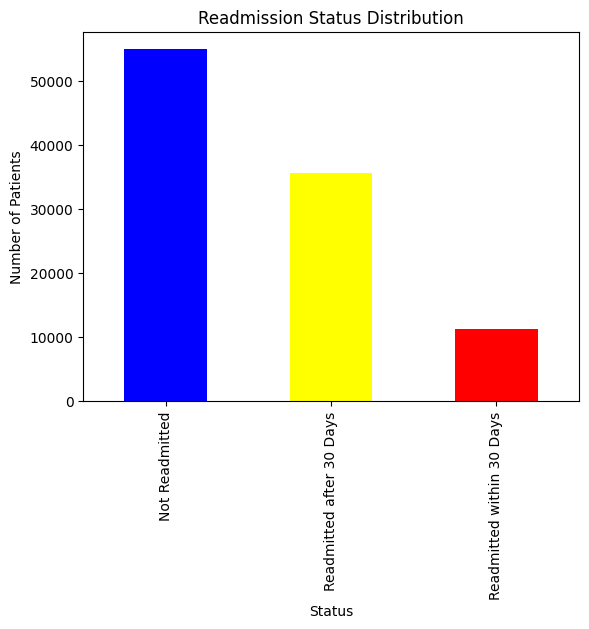

In [93]:
df_final['readmission_status'].value_counts().plot(kind='bar', color=['blue','yellow','red'])
plt.title('Readmission Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.show()

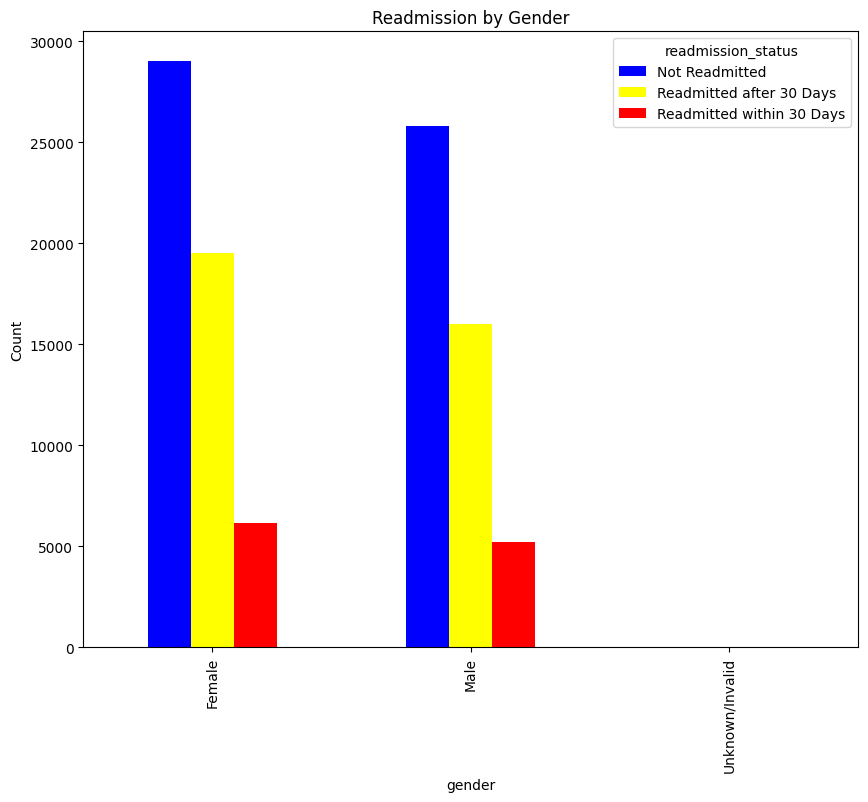

In [94]:
pd.crosstab(df_final['gender'], df_final['readmission_status']).plot(kind='bar', figsize=(10, 8), color=['blue','yellow','red'])
plt.title('Readmission by Gender')
plt.ylabel('Count')
plt.show()

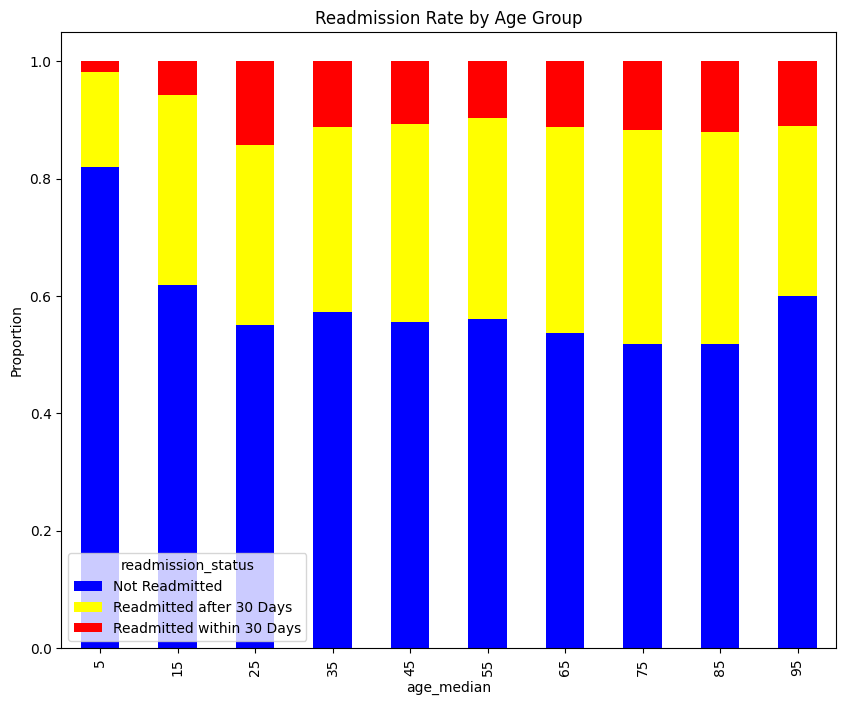

In [95]:
df_final.groupby('age_median')['readmission_status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 8), color=['blue','yellow','red'])
plt.title('Readmission Rate by Age Group')
plt.ylabel('Proportion')
plt.show()

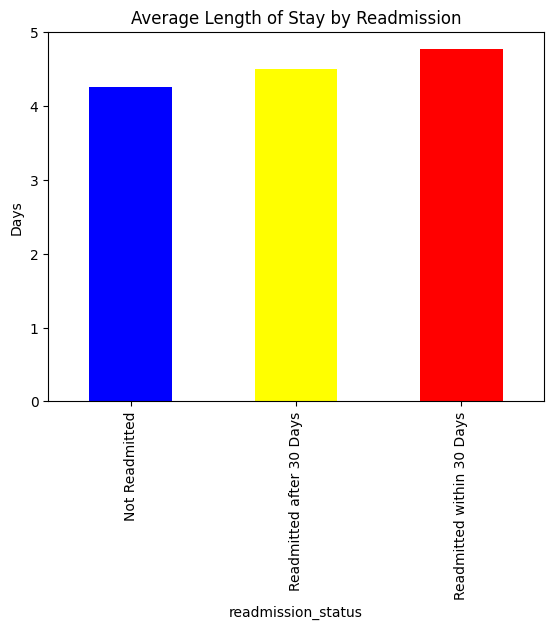

In [96]:
df_final.groupby('readmission_status')['time_in_hospital'].mean().plot(kind='bar', color=['blue','yellow','red'])
plt.title('Average Length of Stay by Readmission')
plt.ylabel('Days')
plt.show()

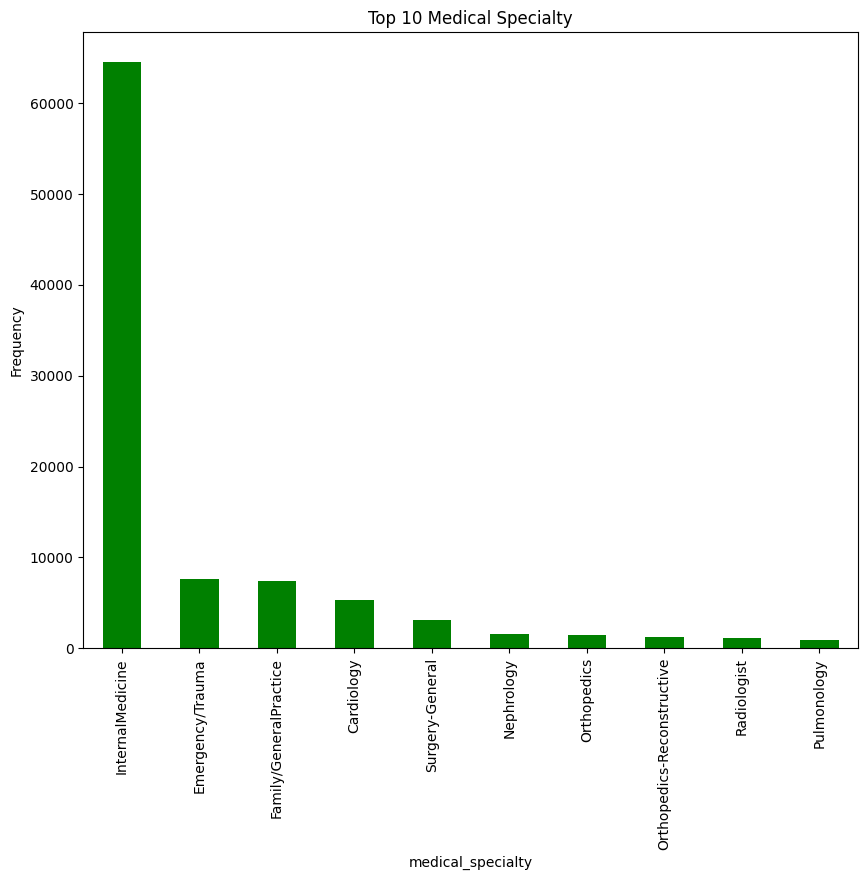

In [97]:
top_speciality = df_final['medical_specialty'].value_counts().head(10)
top_speciality.plot(kind='bar', figsize=(10, 8), color='green')
plt.title('Top 10 Medical Specialty')
plt.ylabel('Frequency')
plt.show()

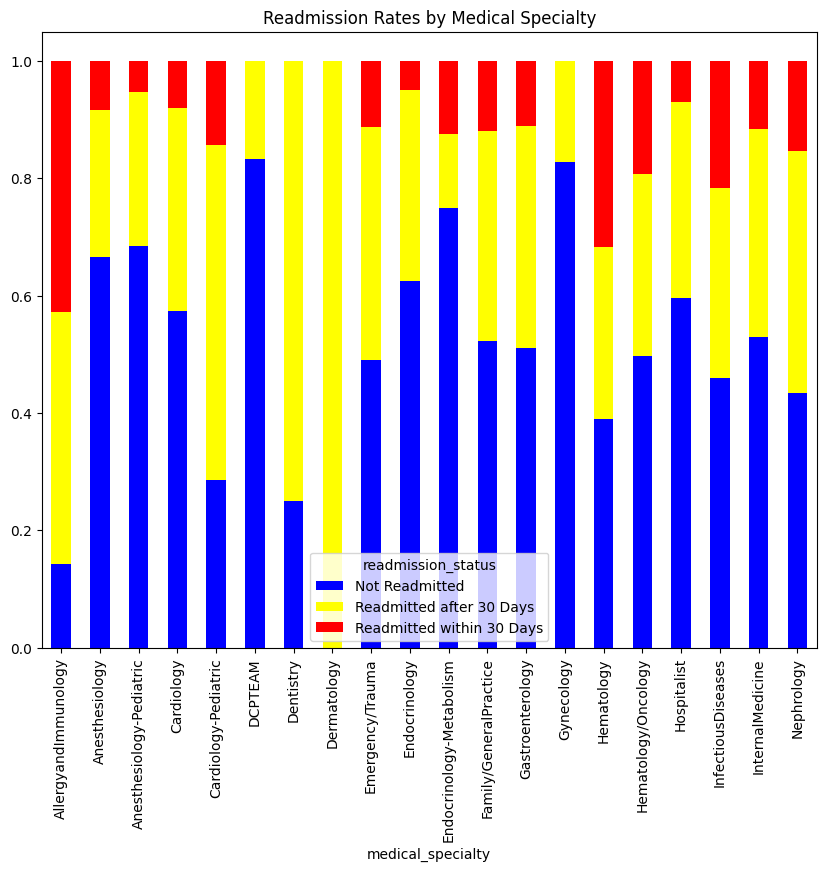

In [98]:
df_final.groupby('medical_specialty')['readmission_status'].value_counts(normalize=True).unstack().fillna(0).head(20).plot(kind='bar', 
                                                                                                                             stacked=True, 
                                                                                                                             figsize=(10, 8), 
                                                                                                                             color=['blue','yellow','red'])
plt.title('Readmission Rates by Medical Specialty')
plt.show()